In [63]:
!pip install xlrd

     |████████████████████████████████| 96 kB 1.6 MB/s eta 0:00:01


In [1]:
from datetime import datetime
import pandas as pd
import requests

d = {'Accept': 'application/json, text/plain, */*',
 'Channel-Name': 'webpublic',
 'X-San-Segment-Id': '2'}
result = requests.get('https://www.santander.com.ar/fondosInformacion/funds?currency=ARS', headers=d).json()

data = result['data']

df = pd.read_excel(data['historyFile'])
df.columns = df.iloc[4]
df = df[5:]


df = df[df.FECHA > datetime(2024,1,1)]
df = df.set_index('FECHA')

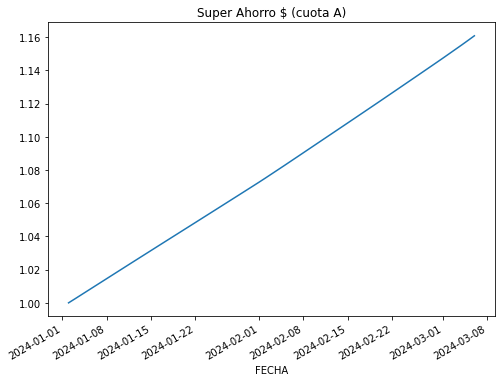

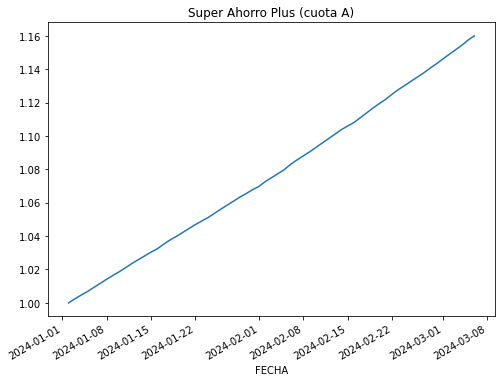

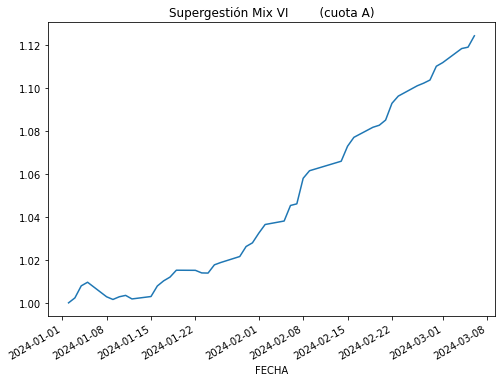

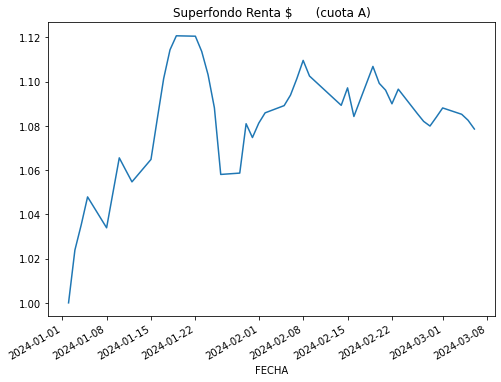

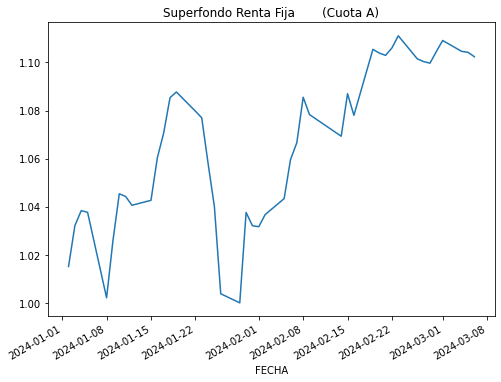

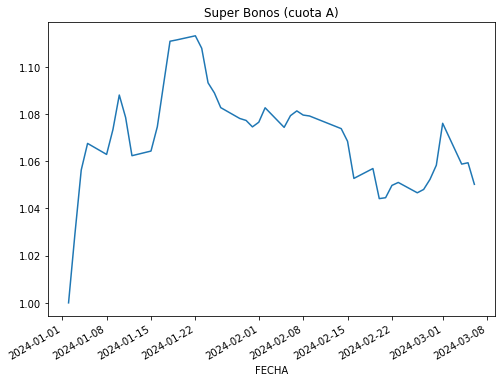

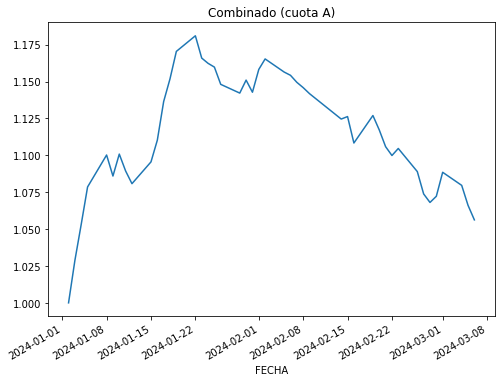

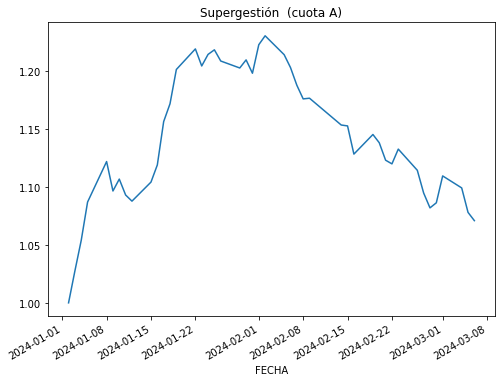

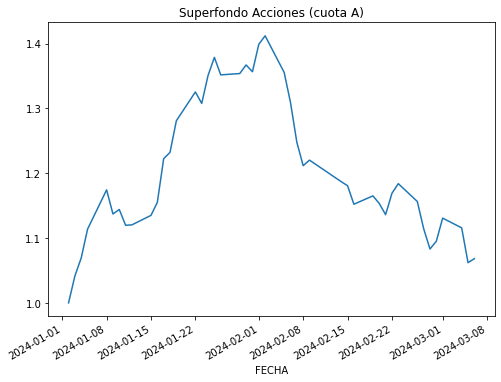

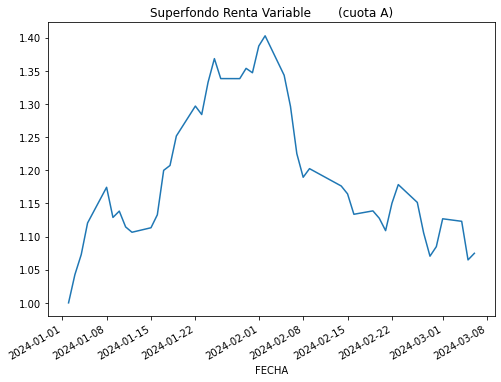

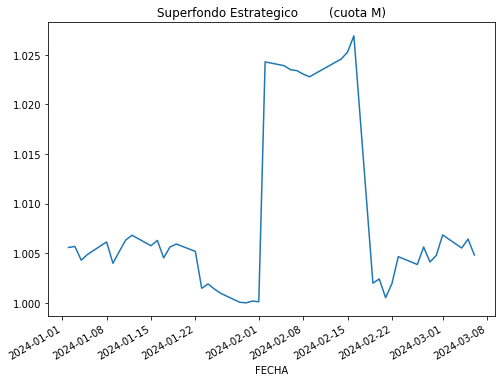

In [2]:
import matplotlib.pyplot as plt

for c in df.columns:
    plt.figure(figsize=(8,6))
    (df[c] / df[c].min()).plot()
    plt.title(c)
    plt.savefig(c + '.png')